In [1]:
import rubin_sim.maf.metrics as metrics
import rubin_sim.maf.slicers as slicers
import rubin_sim.maf.metric_bundles as mb
from rubin_sim.maf.batches.col_map_dict import col_map_dict
from rubin_sim.data import get_baseline

In [2]:
filename = get_baseline()
run_name = filename.replace('.db', '')


In [3]:
bundle_list = []
nyears=10
years = list(range(nyears + 1))
for year in years[1:]:
    sqlconstraint = "night > %i and night <= %i and note like '%%DD%%'" % (
            365.25 * (year - 1),
            365.25 * year,
        )
    
    slicer = slicers.HourglassSlicer()
    metric = metrics.HourglassMetric(
     metric_name="Hourglass"
        )
    bundle = mb.MetricBundle(
            metric,
            slicer,
            constraint=sqlconstraint
        )
    bundle_list.append(bundle)

In [4]:
bd = mb.make_bundles_dict_from_list(bundle_list)
mbg = mb.MetricBundleGroup(bd, filename)

/Users/yoachim/anaconda3/envs/rubin/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 727 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/Users/yoachim/anaconda3/envs/rubin/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 109050 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/Users/yoachim/anaconda3/envs/rubin/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utcut1" yielded 109050 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/Users/yoachim/anaconda3/envs/rubin/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 365 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/Users/yoachim/anaconda3/envs/rubin/lib/python3.11/site-packages/erfa/

/Users/yoachim/anaconda3/envs/rubin/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utcut1" yielded 108750 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/Users/yoachim/anaconda3/envs/rubin/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 364 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/Users/yoachim/anaconda3/envs/rubin/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 54600 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/Users/yoachim/anaconda3/envs/rubin/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utcut1" yielded 54600 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/Users/yoachim/anaconda3/envs/rubin/lib/python3.11/site-packages/erfa

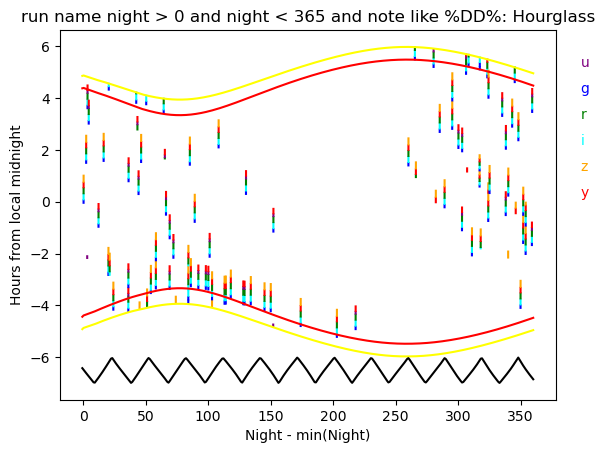

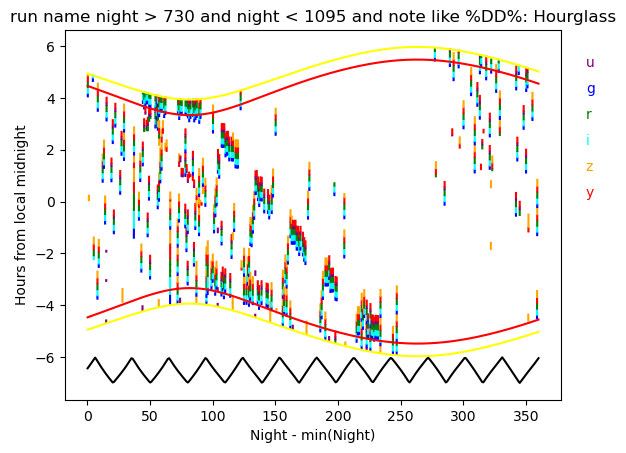

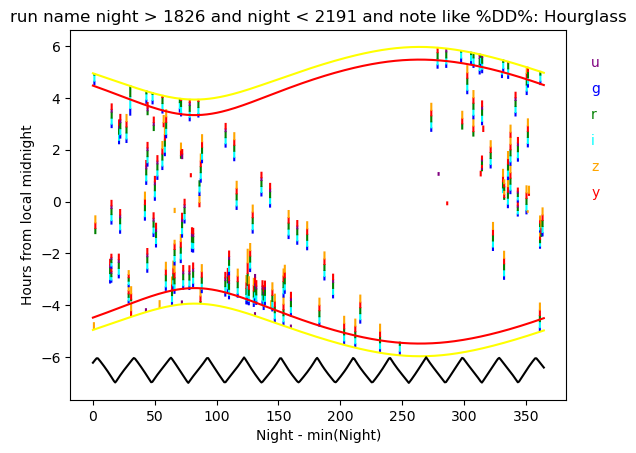

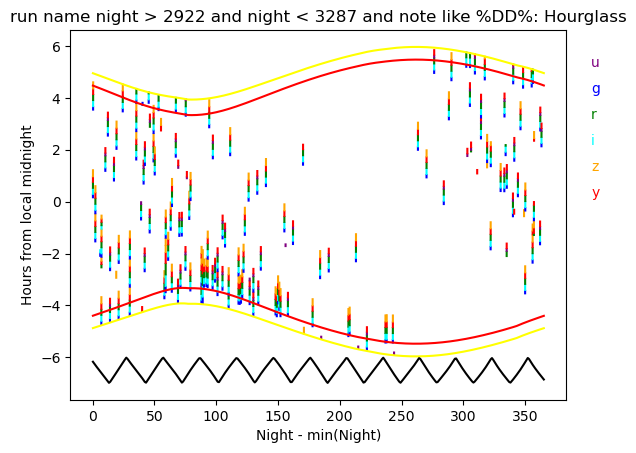

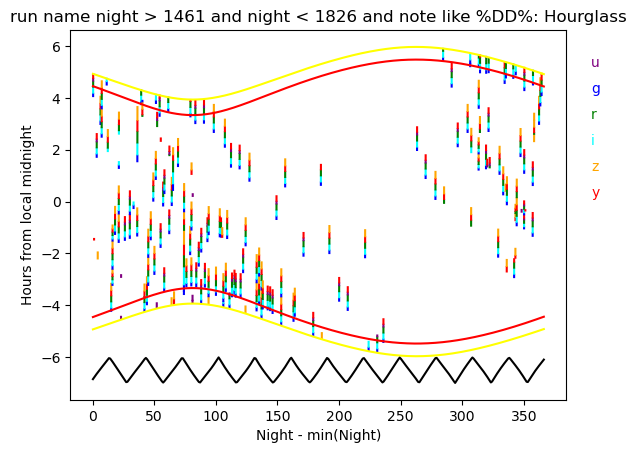

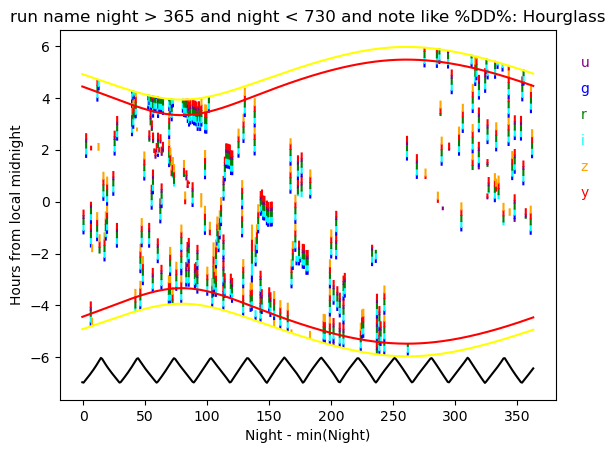

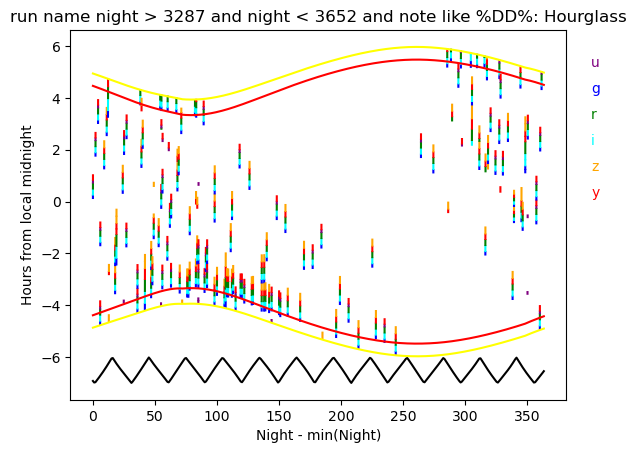

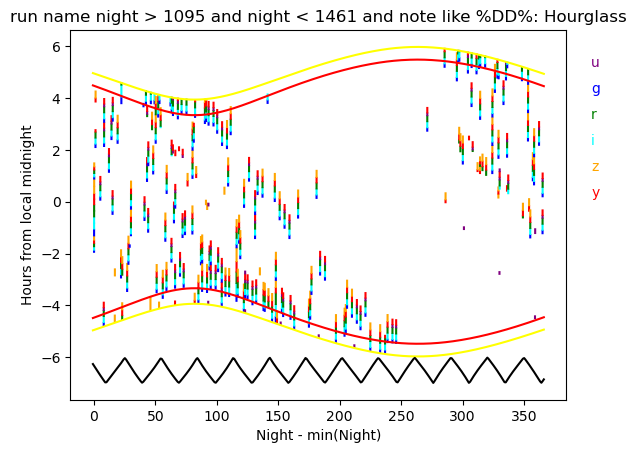

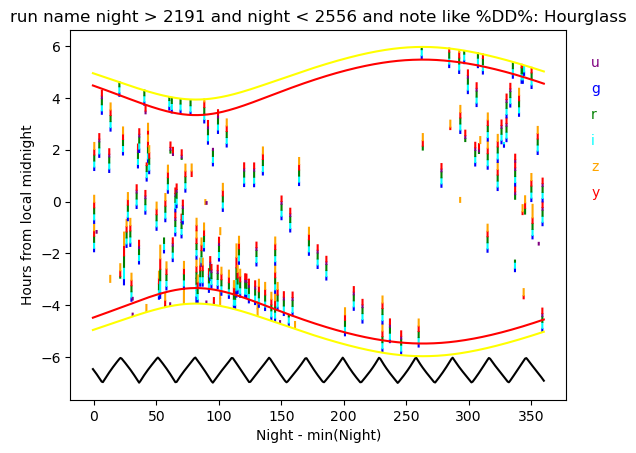

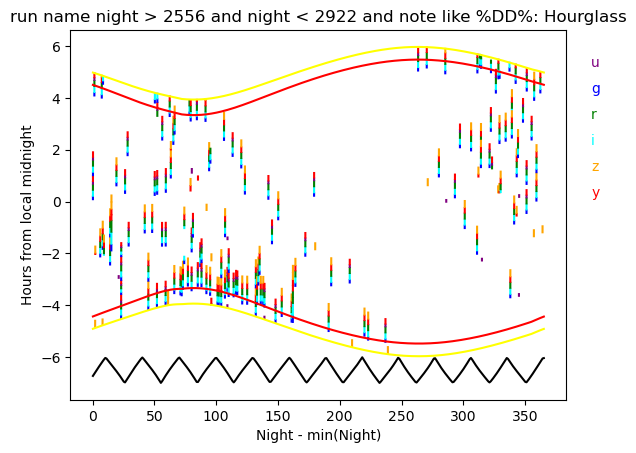

In [5]:
mbg.run_all()
mbg.plot_all(closefigs=False)